In [1]:
from benford.benford import(
    barplot,
    distribution_plot,
    frequency_table,
    chi_squared_passed,
    chi_squared_statistic,
    kolmogorov_smirnov_passed
)
import pandas as pd
import matplotlib.pyplot as plt
from random import sample as random_sample
plt.rcParams['figure.figsize'] = [12, 6]

In [48]:
df = pd.read_csv('data/historical_emissions.csv')

In [49]:
df.head(5)

Country Data source                Sector      Gas    Unit  \
0                World        CAIT  Total including LUCF  All GHG  MtCO₂e   
1                China        CAIT  Total including LUCF  All GHG  MtCO₂e   
2        United States        CAIT  Total including LUCF  All GHG  MtCO₂e   
3                India        CAIT  Total including LUCF  All GHG  MtCO₂e   
4  European Union (27)        CAIT  Total including LUCF  All GHG  MtCO₂e   

       2018      2017      2016      2015      2014  ...      1999      1998  \
0  48939.71  47990.47  47413.95  46760.47  46647.29  ...  34948.94  34929.19   
1  11705.81  11408.26  11207.66  11149.68  11155.76  ...   4053.37   4103.23   
2   5794.35   5613.64   5676.92   5586.69   5711.15  ...   6291.25   6293.80   
3   3346.63   3202.82   3073.24   3002.17   2988.34  ...   1460.24   1382.26   
4   3333.16   3401.95   3387.97   3046.38   2990.49  ...   3934.85   4008.29   

       1997      1996      1995      1994      1993      1992      1991  \
0  35387.89  34068.91  33703.46  32977.47  32766.49  32670.32  32813.46   
1   3963.61   3954.75   3918.30   3528.81   3377.79   3154.54   3023.38   
2   6258.47   6010.62   5843.90   5782.20   5691.26   5583.80   5501.92   
3   1348.09   1289.63   1240.44   1174.78   1128.44   1096.71   1064.49   
4   4048.58   4126.40   4018.79   3968.32   3984.95   4058.11   4202.13   

       1990  
0  32645.91  
1   2873.71  
2   5543.47  
3   1009.44  
4   4279.18  

[5 rows x 34 columns]

In [50]:
df = df.melt( 
        id_vars= [x for x in df.columns if not x.isdigit()],
        value_vars= [x for x in df.columns if x.isdigit()]
)

In [51]:
df.head(5)

Country Data source                Sector      Gas    Unit  \
0                World        CAIT  Total including LUCF  All GHG  MtCO₂e   
1                China        CAIT  Total including LUCF  All GHG  MtCO₂e   
2        United States        CAIT  Total including LUCF  All GHG  MtCO₂e   
3                India        CAIT  Total including LUCF  All GHG  MtCO₂e   
4  European Union (27)        CAIT  Total including LUCF  All GHG  MtCO₂e   

  variable     value  
0     2018  48939.71  
1     2018  11705.81  
2     2018   5794.35  
3     2018   3346.63  
4     2018   3333.16

In [52]:
df = df[~df.value.isna() & (df.value != 0) ]

In [54]:
df[df.variable == 2018]

Empty DataFrame
Columns: [Country, Data source, Sector, Gas, Unit, variable, value]
Index: []

In [38]:
table = frequency_table(df.value.to_list())

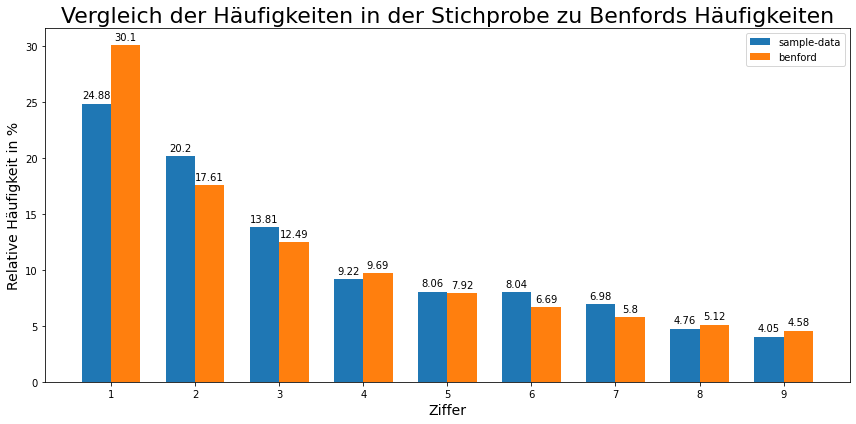

In [39]:
fig = barplot(table)

In [40]:
chi_squared_passed(df.value.to_list())

False

In [41]:
chi_squared_statistic(df.value.to_list())

115.4981944923625

In [3]:
df = pd.read_html('https://www.benfordonline.net/list/chronological')

In [10]:
df = df[0]

In [15]:
sum(df.groupby(0)[0].count())

1745

Text(0.5, 1.0, 'Anzahl der Veröffentlichungen über Benfords Gesetz')

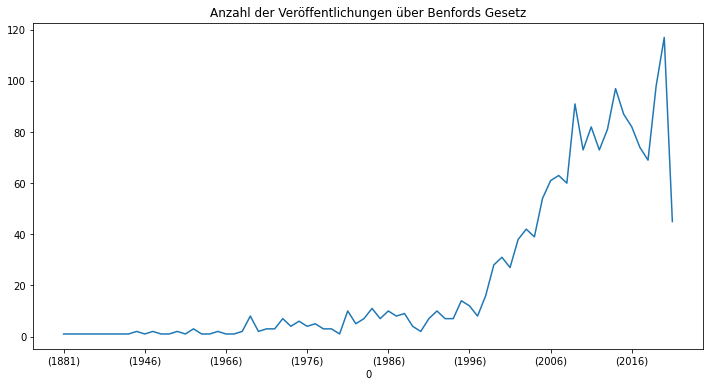

In [19]:
ax = df.groupby(0)[0].count().plot()
ax.set_title("Anzahl der Veröffentlichungen über Benfords Gesetz")